# Vaja 2 - linearni sistemi
Danes bomo spoznali

 1. kako napisatni sistem enačb za praktičen primer
 2. primerno izbiro metode za reševanje
 3. implementacija v programskem jeziku in težave
 
## Opis krivulj z implicitno interpolacijo

Iz množice točk želimo rekonstruirati krivuljo, ki gre skozi te točke. Krivulje v ravnini lahko opišemo na različne načine 

  1. *eksplicitno*: $y=f(x)$
  2. *parametrično*: $(x,y) = (x(t),y(t))$
  3. *implicitno* z enačbo $F(x,y)=0$

Tokrat se bomo posvetili implicitni predstavitvi krivulje. 

### Problem
Imamo točke v ravnini s koordinatami $(x_1,y_1),(x_2,y_2),\ldots, (x_n,y_n)$. Iščemo krivuljo, ki gre skozi vse točke. Po možnosti naj bo krivulja gladka, poleg tega ni nujno, da do zaporedne točke v seznamu, tudi zaporedne točke na krivulji. Krivuljo iščemo v *implicitni* obliki, torej v obliki enačbe

$$F(x,y)=0.$$

Iskano krivuljo bomo zapisali kot ničto nivojnico neke funkcije $F(x,y)$. Iščemo torej funkcijo $F(x,y)$, za katero velja

$$F(x_i,y_i)=0\quad i\le n.$$

Ta pogoj žal ne zadošča. Dodamo moramo še nekaj točk, ki so znotraj območja omejenega s krivuljo. Označimo jih z $(x_{n+1},y_{n+1}),\ldots,(x_m,y_m)$, v katerih predpišemo vrednost $1$

$$F(x_i,y_i)=1\quad i\ge n+1.$$

### Naloga
Napiši program, ki za dane točke poišče interpolacijsko funkcijo oblike
\newcommand{\bfx}{\mathbf{x}}
$$F(\bfx)=\sum_i d_i\phi(\bfx-\bfx_i)+P(\bfx),$$
kjer so 

 * $\bfx = (x,y)$
 * $P(\bfx)$ polinom stopnje 1 (linearna funkcija v $x$ in $y$)
 * $d_i$ primerno izbrane uteži.
 * $\phi$ radialna bazna funkcija, ki je odvisna zgolj od razdalje do $i$-te točke $\|\bfx-\bfx_i\|$.
  * "thin plate": $\phi(r)=|r|^2\log(|r|)$ za 2D
  * Gaussova: $\phi(r)=\exp(-r^2/\sigma^2)$ 
  * racionalni približek za Gaussovo $$\phi(r)=\frac{1}{1+r^{2p}}$$

In [1]:
%load rbf_matrix.m

In [ ]:
function A = rbf_matrix(x0,y0,fi)
% A = rbf_matrix(x0,y0,fi) vrne matriko sistema in desne strani za interpolacijo z RBF
% x0, y0 ... koordinate veznih točk
% fi ... funkcija, ki določa obliko RBF

  [X,Y] = meshgrid(x0,y0);
  A = (X-X').^2+(Y-Y').^ 2;
  A = fi(A);

endfunction


In [2]:
%load int_rbf.m

In [ ]:
function Z = int_rbf(alfa,x0,y0,fi,x,y)
% function [A,b] = rbf(alfa,x0,y0,fi,x,y) izračuna vrednosti interpolanda RBF
% oblike sum_i alfa(i)*fi((x-x0(i))^2 + (y-y0(i))^2)
% alfa ... uteži
% x0, y0 ... koordinate veznih točk
% fi ... funkcija, ki določa obliko RBF
% x,y ... spremenljivke, v katerih želimo izračunati funkcij

n = length(x0);
Z = zeros(size(x));
for i=1:n
    Z = Z + alfa(i)*fi((x-x0(i)).^2 + (y-y0(i)).^2);
end

endfunction


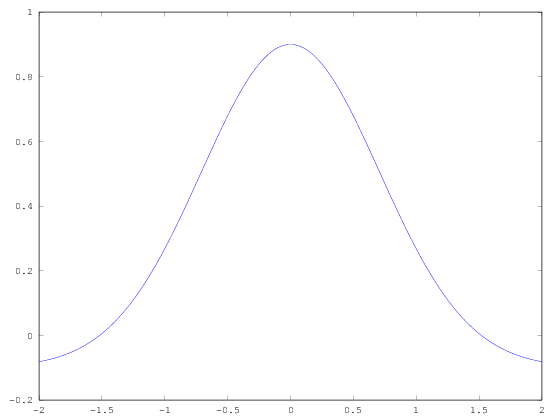

In [3]:
gauss = @(x) exp(-x) - 0.1
t = linspace(-2,2);
plot(t,gauss(t.^2))

## Primer
Za primer interpolirajmo oglišča kvadrata $[0,1]\times [0,1]$. Poleg oglišč, kjer naj bo vrednost 0, vzamemo še središče, kjer naj bo vrednost 1.

In [19]:
x0 = [0 1 1 0 0.5];
y0 = [0 0 1 1 0.5];
h = [ 0 0 0 0 1];

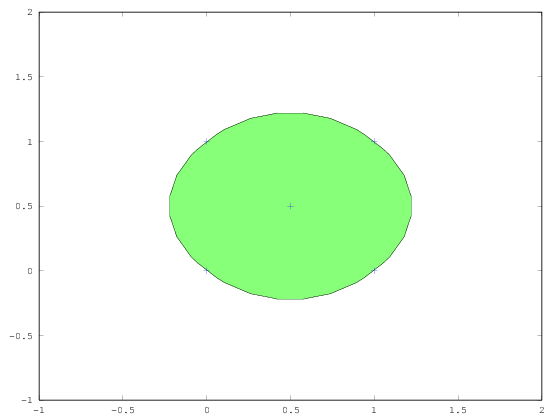

In [20]:
A = rbf_matrix(x0,y0,gauss);
R = chol(A);
alfa  = R\(R'\h');
tx = linspace(-1,2,20); ty = tx;
[X,Y] = meshgrid(tx,ty);
Z = int_rbf(alfa,x0,y0,gauss,X,Y);
contourf(tx,ty,Z,[0 0])
hold on
plot(x0,y0,'+')

Funkcija, ki interpolira naše podatke. Na sliki je označena ničta nivojska krivulja.

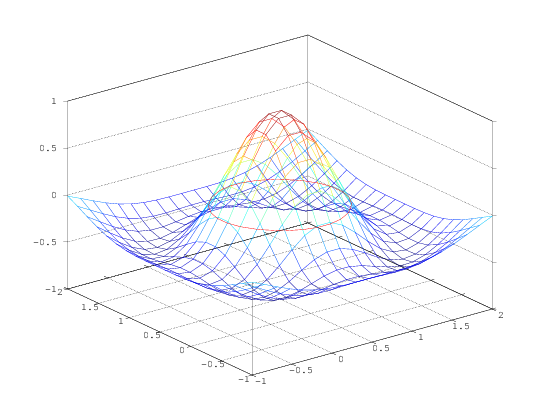

In [11]:
mesh(tx,ty,Z)
hold on
contour3(tx,ty,Z,[0 0],'r')
hold off

# Primer

Namesto ene točke v notranjosti, lahko predpišemo normale v vsaki od interpolacijskih točk. To storimo tako, da vsaki točki na krivulji dodamo točko v notranjosti v smeri normale na iskano krivuljo.

In [22]:
x0 = [0 1 1 0 0.1 0.9 0.9 0.1];
y0 = [0 0 1 1 0.1 0.1 0.9 0.9];
h = [0 0 0 0 1 1 1 1];

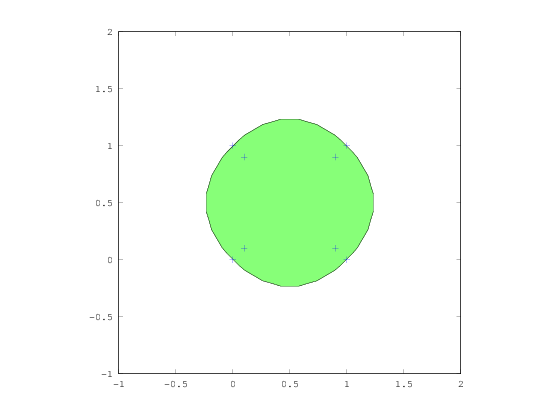

In [24]:
A = rbf_matrix(x0,y0,gauss);
R = chol(A);
alfa  = R\(R'\h');
tx = linspace(-1,2,20); ty = tx;
[X,Y] = meshgrid(tx,ty);
Z = int_rbf(alfa,x0,y0,gauss,X,Y);
contourf(tx,ty,Z,[0 0])
hold on
plot(x0,y0,'+')
hold off
axis equal

# Primer
Še en nesimetričen primer

In [39]:
x0 = [0 1 1 0 0.5  0.5 -0.2 1.2 0.5  0.4 0.1 0.9 0.9 0.1];
y0 = [0 0 1 1 -0.2 0   0.5  0.5 0.75 0.65 0.1 0.1 0.9 0.9];
h =  [0 0 0 0 0    1   0    0   0    1   1   1   1   1];

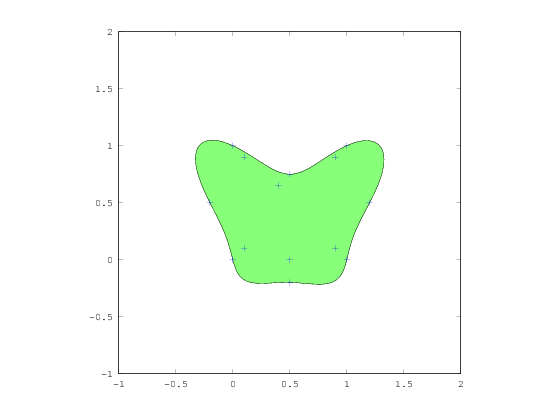

In [43]:
gauss = @(x) exp(-x/4) - 0.1
A = rbf_matrix(x0,y0,gauss);
R = chol(A);
alfa  = R\(R'\h');
tx = linspace(-1,2,100); ty = tx;
[X,Y] = meshgrid(tx,ty);
Z = int_rbf(alfa,x0,y0,gauss,X,Y);
contourf(tx,ty,Z,[0 0])
hold on
plot(x0,y0,'+')
hold off
axis equal